In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

# Paintings

## Get data

### Import data in your notebook

In [14]:
from vincentvanbot.data import get_data_locally
from vincentvanbot.preprocessing.utils import jpg_to_array, get_jpg_link, resize_image
from sklearn.pipeline import Pipeline
from vincentvanbot.preprocessing.imagevectorizer import ImageVectorizer
from vincentvanbot.preprocessing.imageresizer import ImageResizer
import cv2
from vincentvanbot.preprocessing.utils import get_jpg_link
from vincentvanbot.preprocessing.pipeline import build_pipe

In [3]:
df = get_data_locally()
pipe = build_pipe(dim=(420,360))
df_transformed = pipe.fit_transform(df)
df_transformed.shape

(10, 12)

In [4]:
df_transformed.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,IMAGE
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/art/a/aachen/adonis.jpg,painting,mythological,German,1601-1650,"[[[109, 106, 87], [116, 113, 94], [111, 108, 8..."
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/art/a/aachen/allegory.jpg,painting,mythological,German,1601-1650,"[[[95, 89, 77], [81, 76, 64], [68, 65, 53], [5..."
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/art/a/aachen/allegorz.jpg,painting,mythological,German,1601-1650,"[[[125, 104, 59], [94, 72, 37], [63, 39, 16], ..."
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/art/a/aachen/antiope.jpg,painting,mythological,German,1601-1650,"[[[56, 49, 43], [49, 42, 36], [63, 56, 50], [7..."
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/art/a/aachen/athena.jpg,painting,mythological,German,1601-1650,"[[[98, 86, 65], [82, 71, 63], [66, 55, 57], [4..."


### Built KNN

In [13]:
from sklearn.neighbors import NearestNeighbors

In [32]:
#load image

def load_image(html_link):
    jpg_link = get_jpg_link(html_link)
    img = jpg_to_array(jpg_link)
    #x = np.expand_dims(x, axis=0)
    X = resize_image(img,width=420,height=360)
    return img, X


shape of x:  (360, 420, 3)
data type:  uint8


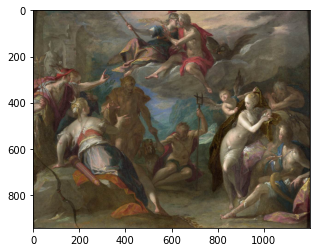

In [33]:
img, X = load_image("https://www.wga.hu/html/a/aachen/gods.html")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [85]:
# Read scaled images as numpy arrays
images = df_transformed['IMAGE'].iloc[:,]

In [93]:
# Flatten so we have ndarrays of shape (108810,)
def flatten_images():
    """Returns df of flattened IMAGE column"""
    flat_images = [image.flatten() for image in images]
    
    return flat_images
    
#flatten_images()[1]
X_flattened = pd.DataFrame(np.vstack(flatten_images()))
X_flattened

,0,1,2,3,4,5,6,7,8,9,...,453590,453591,453592,453593,453594,453595,453596,453597,453598,453599
0,109,106,87,116,113,94,111,108,89,75,...,14,42,25,17,44,30,21,50,26,19
1,95,89,77,81,76,64,68,65,53,52,...,77,135,111,75,131,107,71,125,102,66
2,125,104,59,94,72,37,63,39,16,62,...,99,149,123,87,156,130,92,160,135,94
3,56,49,43,49,42,36,63,56,50,78,...,45,91,67,52,81,61,47,79,61,48
4,98,86,65,82,71,63,66,55,57,42,...,61,85,66,62,74,55,49,82,63,59
5,37,21,22,38,22,22,39,24,21,42,...,12,5,3,12,10,4,10,13,6,12
6,5,3,6,5,3,6,5,3,6,5,...,10,30,12,9,13,7,9,13,7,9
7,31,25,22,28,22,19,30,24,20,27,...,11,20,13,8,18,11,6,20,13,8
8,47,41,29,47,41,29,47,41,29,48,...,21,43,32,26,43,32,27,42,31,28
9,122,120,121,67,65,66,17,15,16,11,...,14,15,15,15,12,12,12,13,13,13


In [105]:
# fit the KNN model

model = NearestNeighbors(n_neighbors=5)
model = model.fit(X_flattened)
NearestNeighbors(n_neighbors=5)

#connections between neighboring points:
A = model.kneighbors_graph(X_flattened)
A.toarray()

array([[1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1.]])

In [140]:
test_X = X_flattened.iloc[:1]
#test_X = test_X.reshape(1, -1)

model.kneighbors(test_X,n_neighbors=3)

(array([[    0.        , 37515.61746793, 38147.06809179]]), array([[0, 9, 8]]))

In [136]:
test_X

df_transformed.iloc[ind_df.iloc[1]]

,0,1,2,3,4,5,6,7,8,9,...,453590,453591,453592,453593,453594,453595,453596,453597,453598,453599
0,109,106,87,116,113,94,111,108,89,75,...,14,42,25,17,44,30,21,50,26,19


In [107]:
idx_closest = model.kneighbors(test_X,n_neighbors=3)[0]
idx_closest

array([[    0.        , 37515.61746793, 38147.06809179]])

In [108]:
idx_closest[:,2]

array([38147.06809179])

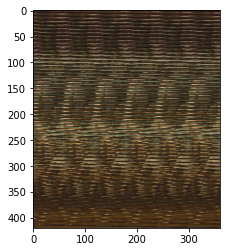

In [113]:
#test_X.reshape(1, 420, 360)

new_x = np.array(test_X)
plt.imshow(new_x.reshape((420, 360, 3)))

In [99]:
df_transformed.iloc[7]

AUTHOR                                        AACHEN, Hans von
BORN-DIED                      (b. 1552, Köln, d. 1615, Praha)
TITLE                                      David and Bathsheba
DATE                                                   1612-15
TECHNIQUE                          Oil on canvas, 128 x 105 cm
LOCATION                      Kunsthistorisches Museum, Vienna
URL               https://www.wga.hu/art/a/aachen/davidbat.jpg
FORM                                                  painting
TYPE                                                historical
SCHOOL                                                  German
TIMEFRAME                                            1601-1650
IMAGE        [[[31, 25, 22], [28, 22, 19], [30, 24, 20], [2...
Name: 7, dtype: object

In [100]:
# Pass song to model, ask for 11 closest points, and unpack the corresponding indices to a list


distance_list = list(model.kneighbors(X_flattened,n_neighbors=5)[0][0])
distance_df = pd.DataFrame(distance_list, columns=['distance'])    
distance_df



# Filter original dataframe with indices list and sort by tempo
#df.iloc[ind_list, :].sort_values(by="IMAGE")

#function takes as input of flatten images 
#output df with disatnce

,distance
0,0.000000
1,37515.617468
2,38147.068092
3,39009.852115
4,39656.707402


In [101]:
ind_list = list(model.kneighbors(X_flattened,n_neighbors=5)[1][0])
#ind_list
ind_df = pd.DataFrame(ind_list, columns=['index'])    
ind_df

,index
0,0
1,9
2,8
3,7
4,2


In [102]:
details_df = df_transformed.iloc[ind_df.iloc[1]].drop(columns=["URL", "IMAGE"])
details_df

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMEFRAME
9,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Pan and Selene,1600-05,"Oil on panel, 40 x 49 cm",Private collection,painting,mythological,German,1601-1650


In [103]:
#df.to_dict('details_df')

In [104]:
lst = []
for idx in idx_closest:
    img = image.load_img(flat_images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    lst.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

NameError: name 'image' is not defined

<class 'numpy.ndarray'> (1203, 1500, 3)


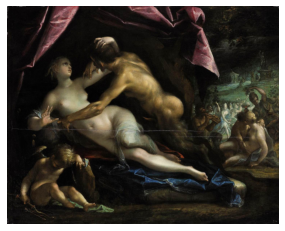

In [24]:
# grab a random image
def load_image():
    random_img_html = df_transformed.iloc[np.random.randint(0,len(df_transformed))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)

    print(type(random_img_arr), random_img_arr.shape)

    # display  image
    plt.imshow(random_img_arr)
    plt.axis('off');

load_imgage()